# 7. AIRBNB EXPLORATORY DATA ANALYSIS
---

## 1. Getting Familiar with the Dataset

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 99)
pd.set_option("display.max_rows", 999)
pd.set_option('precision', 3)

chicago = pd.read_csv('data/chicago_airbnb1')
chicago.head()

,host_rt,host_rr,host_ar,superhost,neighborhood,latitude,longitude,property_type,room_type,accommodates,baths,bedrooms,beds,amenities,min_nights,max_nights,n_reviews,rs_rating,rs_accuracy,rs_cleanliness,rs_check_in,rs_communication,rs_location,rs_value,instant_bookable,reviews_per_month,price
0,3H,100.0,100.0,1,Hyde Park,41.788,-87.588,condomium,Private room,1,0.5,1.0,1.0,"[""Hangers"", ""Extra pillows and blankets"", ""Wif...",2,90,178,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,2.59,66.0
1,1H,100.0,96.0,1,South Lawndale,41.855,-87.697,apartment,Entire place,7,1.0,3.0,5.0,"[""Hangers"", ""Extra pillows and blankets"", ""Wif...",2,60,395,96.0,10.0,9.0,10.0,10.0,10.0,9.0,1,2.82,94.0
2,1H,100.0,98.0,1,West Town,41.903,-87.682,apartment,Entire place,2,1.0,1.0,1.0,"[""Hangers"", ""Bathtub"", ""Wifi"", ""TV"", ""Extra pi...",2,60,384,93.0,10.0,9.0,10.0,10.0,10.0,10.0,0,2.83,61.0
3,1H,92.0,97.0,1,Lincoln Park,41.918,-87.638,apartment,Entire place,4,1.0,1.0,0.0,"[""Hangers"", ""Wifi"", ""TV"", ""Smoke alarm"", ""Carb...",4,180,49,92.0,10.0,9.0,10.0,9.0,10.0,9.0,1,0.63,67.0
4,3H,90.0,95.0,0,Hyde Park,41.796,-87.593,apartment,Private room,2,0.5,1.0,1.0,"[""Hangers"", ""Extra pillows and blankets"", ""Wif...",1,1125,44,82.0,8.0,7.0,9.0,9.0,10.0,9.0,0,0.62,22.0


In [2]:
chicago.shape

(6550, 27)

In [3]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6550 entries, 0 to 6549
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   host_rt            6550 non-null   object 
 1   host_rr            5166 non-null   float64
 2   host_ar            5935 non-null   float64
 3   superhost          6550 non-null   int64  
 4   neighborhood       6550 non-null   object 
 5   latitude           6550 non-null   float64
 6   longitude          6550 non-null   float64
 7   property_type      6550 non-null   object 
 8   room_type          6550 non-null   object 
 9   accommodates       6550 non-null   int64  
 10  baths              6544 non-null   float64
 11  bedrooms           6028 non-null   float64
 12  beds               6513 non-null   float64
 13  amenities          6550 non-null   object 
 14  min_nights         6550 non-null   int64  
 15  max_nights         6550 non-null   int64  
 16  n_reviews          6550 

## 2. Separating Categorical from Numerical

In [4]:
num_cols = ['host_rr', 'host_ar', 'latitude', 'longitude', 'accommodates',
            'baths', 'bedrooms', 'beds', 'min_nights', 'max_nights', 'n_reviews', 
            'rs_rating', 'rs_accuracy', 'rs_cleanliness', 'rs_check_in', 
            'rs_communication', 'rs_location', 'rs_value', 'reviews_per_month']
cat_cols = ['host_rt', 'superhost', 'neighborhood', 'property_type', 'room_type', 
            'amenities', 'instant_bookable']
y_col = ['price']
chicago_num = chicago[num_cols].copy()
chicago_cat = chicago[cat_cols].copy()

chicago_num.shape, chicago_cat.shape

((6550, 19), (6550, 7))

## 3. Creating a Training and Test Sets

In [5]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(chicago, test_size=0.2, random_state=42)

X_train = train.drop('price', axis=1)
y_train = train['price']

X_test = test.drop('price', axis=1)
y_test = test['price']

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5240, 26), (5240,), (1310, 26), (1310,))

## 4. Exploring the Correlation

<AxesSubplot:>

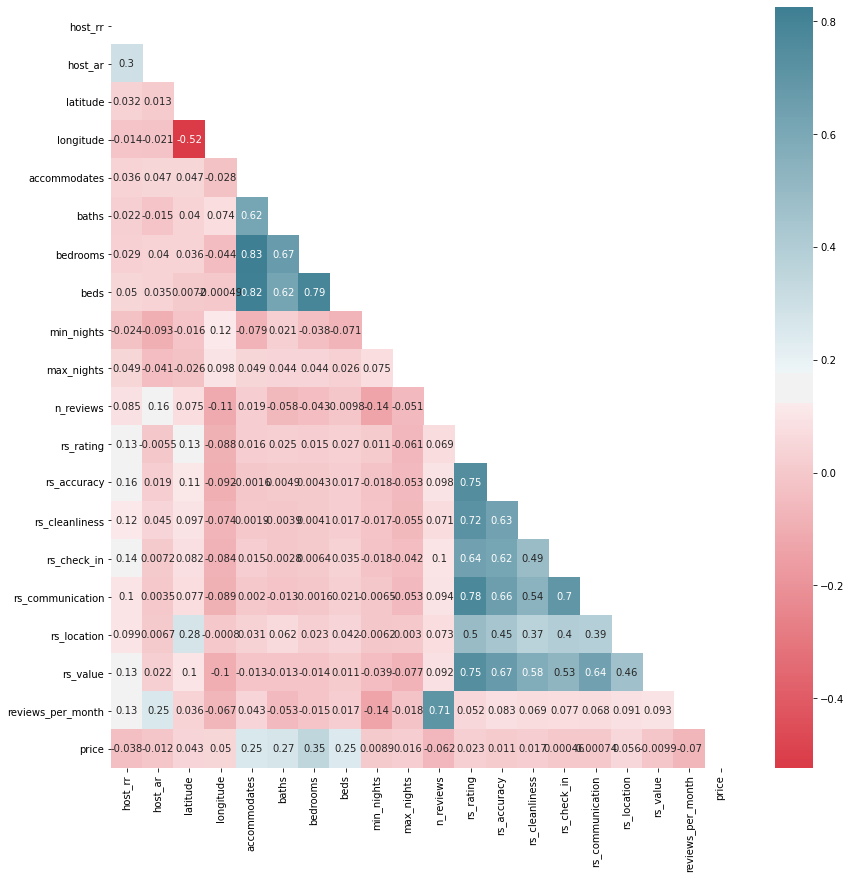

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_cols = num_cols + ['price']
corr = train[corr_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
color = sns.diverging_palette(10, 220, as_cmap=True)
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(corr, mask=mask, cmap=color, annot=True)

There doesn't seem to be strong linear correlation with the `price`. There is, however, a slight positive correlation with `accommodates, baths, bedrooms`, and `beds`.
## 5. Basic Stats from Numerical Columns

In [7]:
train_num = train[num_cols]
train_num.describe().T

,count,mean,std,min,25%,50%,75%,max
host_rr,4109.0,93.601,17.442,0.000,97.000,100.000,100.000,100.000
host_ar,4734.0,88.236,19.536,0.000,86.000,97.000,100.000,100.000
latitude,5240.0,41.898,0.059,41.647,41.874,41.902,41.939,42.022
longitude,5240.0,-87.663,0.043,-87.845,-87.687,-87.660,-87.632,-87.538
accommodates,5240.0,4.153,2.841,0.000,2.000,4.000,6.000,16.000
baths,5235.0,1.248,0.774,0.000,1.000,1.000,1.500,11.000
bedrooms,4820.0,1.755,1.074,1.000,1.000,1.000,2.000,12.000
beds,5209.0,2.132,1.791,0.000,1.000,2.000,3.000,30.000
min_nights,5240.0,7.900,20.853,1.000,1.000,2.000,3.000,365.000
max_nights,5240.0,688.861,525.081,1.000,40.000,1125.000,1125.000,9000.000


In [8]:
train_num.max() - train_num.min()

host_rr               100.000
host_ar               100.000
latitude                0.375
longitude               0.307
accommodates           16.000
baths                  11.000
bedrooms               11.000
beds                   30.000
min_nights            364.000
max_nights           8999.000
n_reviews             627.000
rs_rating              80.000
rs_accuracy             8.000
rs_cleanliness          8.000
rs_check_in             8.000
rs_communication        8.000
rs_location             8.000
rs_value                8.000
reviews_per_month      30.080
dtype: float64

After taking care of missing values, we will have to check for outliers especially for:
- min_nights           
- max_nights          
- n_reviews
## 6. Identifying Numerical Missing Data

In [9]:
missing_ = train_num.isnull().mean().sort_values(ascending=False)
missing_

host_rr              2.158e-01
rs_communication     1.912e-01
rs_value             1.910e-01
rs_location          1.910e-01
rs_check_in          1.910e-01
rs_cleanliness       1.908e-01
rs_accuracy          1.908e-01
rs_rating            1.889e-01
reviews_per_month    1.802e-01
host_ar              9.656e-02
bedrooms             8.015e-02
beds                 5.916e-03
baths                9.542e-04
n_reviews            0.000e+00
min_nights           0.000e+00
accommodates         0.000e+00
longitude            0.000e+00
latitude             0.000e+00
max_nights           0.000e+00
dtype: float64

In [10]:
num_missing = missing_.to_frame()
num_missing_ = num_missing.head(13)
num_missing_

,0
host_rr,2.158e-01
rs_communication,1.912e-01
rs_value,1.910e-01
rs_location,1.910e-01
rs_check_in,1.910e-01
rs_cleanliness,1.908e-01
rs_accuracy,1.908e-01
rs_rating,1.889e-01
reviews_per_month,1.802e-01
host_ar,9.656e-02


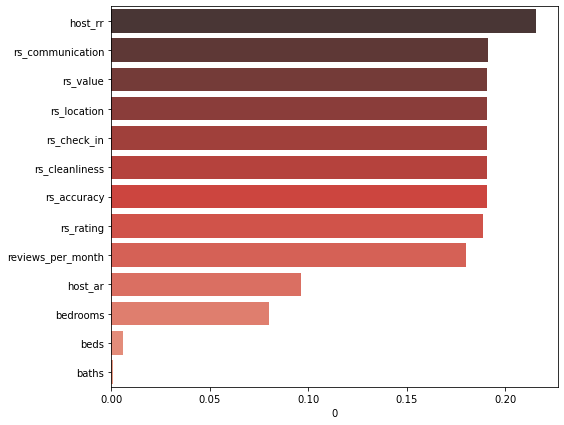

In [11]:
plt.figure(figsize=(8,7))
ax = sns.barplot(x=0, y=num_missing_.index, data=num_missing_,
                palette="Reds_d")

## 7. Imputing Missing Values in Numerical Columns

We are going to take care of missing values starting from the column missing the lowest percentage of data to the column missing the most. We are not going to treat all columns with missing data the same.

- **Baths**: we want to 
    - groupby property type and 
    - then room type and 
    - calculate the value counts for the `baths` column
    - fill in the missing data with most frequent value

In [12]:
chicago['baths'].isnull().sum()

6

In [13]:
chicago.groupby(['property_type', 'room_type'])['baths'].value_counts(dropna=False).head(12)

property_type  room_type     baths
apartment      Entire place  1.0      2307
                             2.0       529
                             1.5        62
                             3.0        44
                             2.5        38
                             4.0        13
                             3.5         5
                             6.0         3
                             NaN         2
                             5.0         2
                             0.0         1
                             4.5         1
Name: baths, dtype: int64

In [14]:
mode = chicago['baths'].mode()[0]
chicago['baths'] = chicago.groupby(['property_type', 'room_type'])['baths'].\
apply(lambda x:x.fillna(x.value_counts().idxmax() 
                        if x.value_counts().max() >=1
                       else mode , inplace = False
                       )
     )
chicago['baths'].isnull().sum()

0

- **Beds:** we want to 
    - group by property type, room type, and baths
    - calculate value counts for `beds` column
    - fill in missing data with the mode

In [15]:
chicago.groupby(['property_type', 'room_type', 'baths'])['beds'].value_counts(dropna=False).head(12)

property_type  room_type     baths  beds
apartment      Entire place  0.0    0.0       1
                             1.0    1.0     961
                                    2.0     832
                                    3.0     314
                                    4.0     107
                                    0.0      44
                                    5.0      31
                                    6.0       9
                                    7.0       5
                                    NaN       3
                                    8.0       2
                                    9.0       1
Name: beds, dtype: int64

In [16]:
mode = chicago['beds'].mode()[0]
chicago['beds'] = chicago.groupby(['property_type', 'room_type', 'baths'])['beds'].\
apply(lambda x:x.fillna(x.value_counts().idxmax() 
                        if x.value_counts().max() >=1
                       else mode , inplace = False
                       )
     )
chicago['beds'].isnull().sum()

0

- **Bedrooms:** same strategy but we add `beds` to our groupby list before `baths`

In [17]:
mode = chicago['bedrooms'].mode()[0]
chicago['bedrooms'] = chicago.groupby(['property_type', 'room_type', 'beds', 'baths'])['bedrooms'].\
apply(lambda x:x.fillna(x.value_counts().idxmax() 
                        if x.value_counts().max() >=1
                       else mode , inplace = False
                       )
     )
chicago['bedrooms'].isnull().sum()

0

 - **The rest of the columns with missing data**:
     - we groupby property type, room type, bedrooms, and baths
     - count value counts for each column
     - fill in the median, since they are continuous data

In [18]:
gr_cols = ['property_type', 'room_type', 'bedrooms', 'baths']
chicago.groupby(gr_cols)['host_ar'].value_counts(dropna=False)

property_type  room_type     bedrooms  baths  host_ar
apartment      Entire place  1.0       0.00   100.0        1
                                       1.00   100.0      290
                                              99.0       276
                                              NaN        121
                                              95.0        58
                                                        ... 
townhouse      Private room  2.0       1.25   89.0         1
                                       1.50   91.0         1
                                       2.00   89.0         1
                             3.0       2.50   NaN          1
                             4.0       1.50   90.0         1
Name: host_ar, Length: 1580, dtype: int64

In [19]:
missing_cols = ['host_rr', 'rs_communication', 'rs_value', 'rs_location', 'rs_check_in',
                'rs_cleanliness', 'rs_accuracy', 'rs_rating', 'reviews_per_month', 'host_ar']  
for col in missing_cols:
    median = chicago[col].median()
    chicago[col] = chicago.groupby(gr_cols)[col].apply(
        lambda x:x.fillna(x.median()
                         if x.nunique() >=1
                         else median
                         )
    )    
chicago[missing_cols].isnull().sum()

host_rr              0
rs_communication     0
rs_value             0
rs_location          0
rs_check_in          0
rs_cleanliness       0
rs_accuracy          0
rs_rating            0
reviews_per_month    0
host_ar              0
dtype: int64

Now, this is just awesome! Instead of generally imputing median, we strategically took care of missing values column by column until we got to the point of generalizing the rest of the columns. Groupby is a strong feature in `pandas` that I should use more often than I though before this. Let's now take care of outliers in 
- min_nights
- max_nights
- n_reviews

## 8. Examining Outliers

In [20]:
outlier_cols = ['min_nights', 'max_nights', 'n_reviews']
chicago[outlier_cols].max() - chicago[outlier_cols].min()

min_nights     499
max_nights    8999
n_reviews      627
dtype: int64

In [21]:
chicago[outlier_cols].describe()

,min_nights,max_nights,n_reviews
count,6550.000,6550.000,6550.000
mean,7.916,683.961,42.427
std,21.789,523.521,66.093
min,1.000,1.000,0.000
25%,1.000,35.000,2.000
50%,2.000,1125.000,15.000
75%,3.000,1125.000,56.000
max,500.000,9000.000,627.000


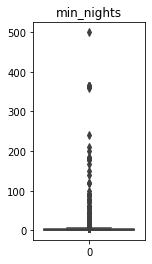

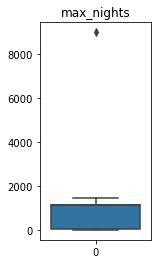

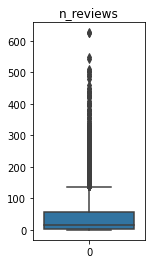

In [22]:
for col in outlier_cols:
    plt.figure(figsize=(2,4))
    ax = sns.boxplot(data=chicago[col])
    plt.title(col)
    plt.show()

There might not be much we can do about `n_reviews`, but we can certainly take care of that one outlier in `max_nights` by:
- checking the distribution (histogram, Q-Q plot, and boxplot)
- limiting the extreme maximum to include `99% of the data` (`winsorization`)

## 9. Winsorizing `max_nights`

In [23]:
chicago['max_nights'].quantile(0.99)

1125.0

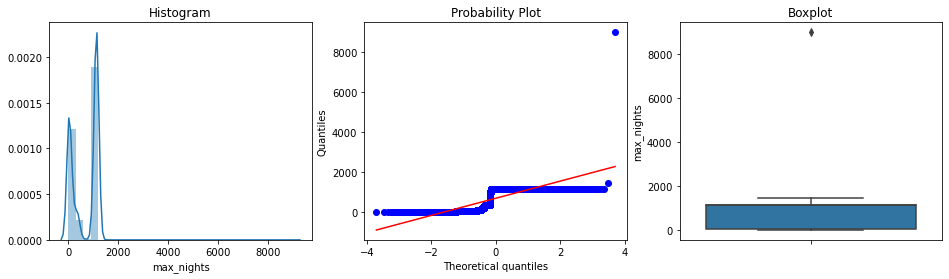

In [24]:
import scipy.stats as stats

def diagnostic_plots(df, variable):    
    plt.figure(figsize=(16, 4))
    
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Quantiles')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()
    
diagnostic_plots(chicago, 'max_nights')

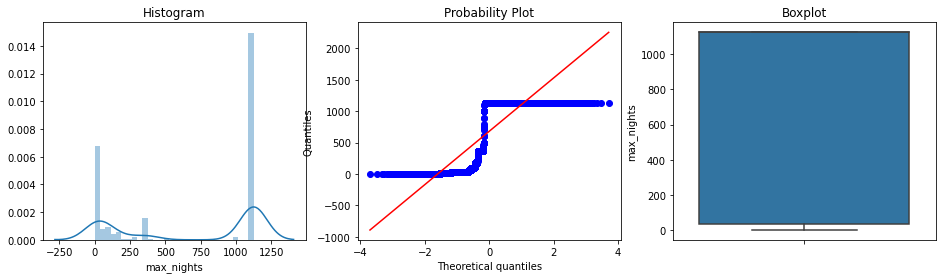

In [25]:
def winsorise(df, variable, ul):
    return np.where(df[variable] > ul, ul, df[variable])

ul = chicago['max_nights'].quantile(0.99)
chicago['max_nights'] = winsorise(chicago, 'max_nights', ul)
diagnostic_plots(chicago, 'max_nights')

## 10. Winsorising `min_nights`

In [26]:
chicago['min_nights'].quantile(0.99)

60.0

In [27]:
chicago['min_nights'].quantile(0.01)

1.0

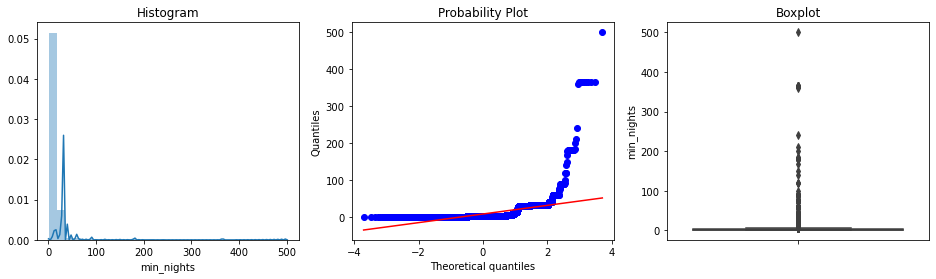

In [28]:
diagnostic_plots(chicago, 'min_nights')

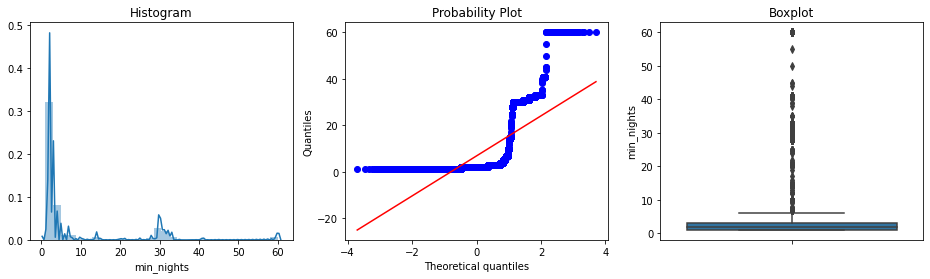

In [29]:
ul = chicago['min_nights'].quantile(0.99)
chicago['min_nights'] = winsorise(chicago, 'min_nights', ul)
diagnostic_plots(chicago, 'min_nights')

We did not get rid of all outliers but that wasn't the goal. We just needed to trim the maximum extreme a little bit. 

In [30]:
chicago[outlier_cols].max() - chicago[outlier_cols].min()

min_nights      59.0
max_nights    1124.0
n_reviews      627.0
dtype: float64

So we've taken care of missing values in numerical columns and fixed some outliers. Next we will look at categorical columns and fix missing data
## 11. Categorical Attributes: Missing Data

In [31]:
chicago.isnull().sum()

host_rt              0
host_rr              0
host_ar              0
superhost            0
neighborhood         0
latitude             0
longitude            0
property_type        0
room_type            0
accommodates         0
baths                0
bedrooms             0
beds                 0
amenities            0
min_nights           0
max_nights           0
n_reviews            0
rs_rating            0
rs_accuracy          0
rs_cleanliness       0
rs_check_in          0
rs_communication     0
rs_location          0
rs_value             0
instant_bookable     0
reviews_per_month    0
price                0
dtype: int64